In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
# step 2
# Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
convers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-bogdanova/stat_lesson2/conversion.csv')
convers.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
convers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
# проверка на нули
convers.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
# Сколько уникальных рекламных кампаний было проведено? 
convers.xyz_campaign_id.nunique()

3

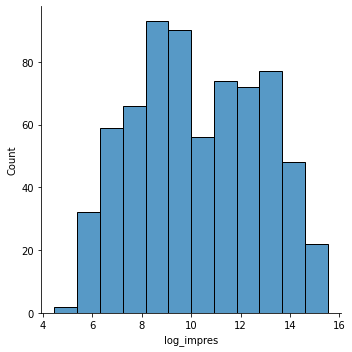

In [9]:
# step 4
# Постройте график распределения числа показов 
# (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. 
step_4 = convers \
    .groupby('fb_campaign_id', as_index = False) \
    .agg({'Impressions' : 'sum'})
step_4['log_impres'] = np.log(step_4['Impressions'])

sns.displot(step_4, x = 'log_impres')

In [11]:
# step 5
# Теперь посчитаем ещё несколько полезных метрик. 
# Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.
convers['ctr'] = convers['Clicks']/convers['Impressions']
convers.sort_values('ctr', ascending = False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


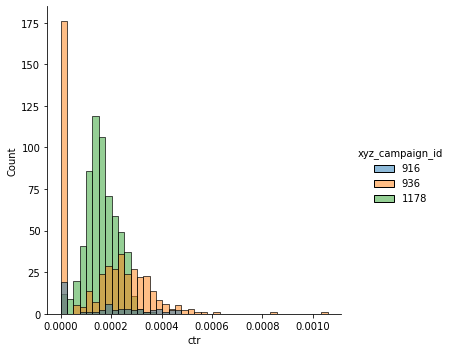

In [14]:
# step 6
# Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?
sns.displot(convers, x = 'ctr', hue = 'xyz_campaign_id', palette = 'tab10')

In [16]:
# step 7
# CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:
# Выведите описательные статистики для новой переменной, посмотрите на форму распределения. 
# В ответе укажите межквартильный размах, округленный до двух знаков после точки.
convers['cpc'] = convers['Spent']/convers['Clicks']
['cpc'].dropna().describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [19]:
# считаем межквартильный размах
scipy.stats.iqr(convers['cpc'], nan_policy='omit')

0.25436369905

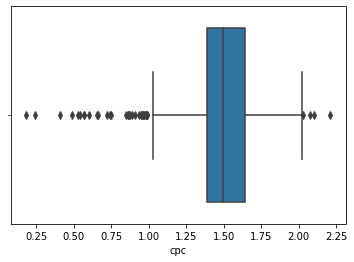

In [23]:
step_7 = convers.dropna()
sns.boxplot(x = step_7['cpc'])

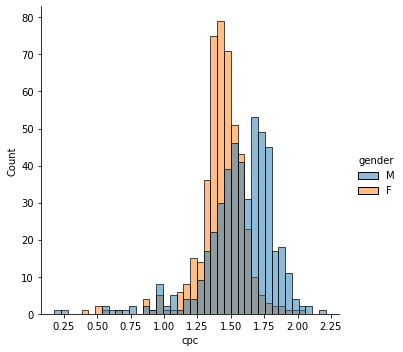

In [24]:
# step 8 
# Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?
sns.displot(step_7, x = 'cpc', hue = 'gender', palette = 'tab10')

In [27]:
#  step 9
#  Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, 
# к общему числу тех, кто дошел до данного этапа.
# Посчитайте конверсию из клика в покупку. 
# В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. 
# Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.
convers['conversion_rate'] = convers['Approved_Conversion']/convers['Clicks']*100
convers.query('ad_id == 1121814')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,conversion_rate
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.087886
